<h1><center>Исследование технологического процесса очистки золота</center></h1>

Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Компанией были предоставлены данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Цель работы** – подготовить прототип модели машинного обучения для предсказания коэффициента восстановления золота. 

**Ход работы**
1. [Подготовка данных](#Подготовка-данных)
3. [Анализ избыточных признаков](#Анализ-избыточных-признаков)
4. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
5. [Построение модели](#Построение-модели)
6. [Итоговое тестирование](#Итоговое-тестирование)
7. [Вывод](#Вывод)

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

### Знакомство с данными

In [2]:
try:
    gold_full = pd.read_csv(r'C:\Users\Jemiah\Documents\Jupyter_Data\gold_recovery_full_new.csv')
    gold_train = pd.read_csv(r'C:\Users\Jemiah\Documents\Jupyter_Data\gold_recovery_train_new.csv')
    gold_test = pd.read_csv(r'C:\Users\Jemiah\Documents\Jupyter_Data\gold_recovery_test_new.csv')
except:
    gold_full = pd.read_csv(r'/datasets/gold_recovery_full_new.csv')
    gold_train = pd.read_csv(r'/datasets/gold_recovery_train_new.csv')
    gold_test = pd.read_csv(r'/datasets/gold_recovery_test_new.csv')

In [3]:
gold_full.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [4]:
gold_train.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [5]:
gold_test.head(2)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


In [6]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [7]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
# изменяем тип данных признака date
gold_full['date'] = pd.to_datetime(gold_full['date'])
gold_train['date'] = pd.to_datetime(gold_train['date'])
gold_test['date'] = pd.to_datetime(gold_test['date'])

In [10]:
# вычисление процента пропусков для колонки датафрейма

is_null = (gold_train.isna().sum() * 100 / len(gold_train)) \
    .sort_values(ascending=False)

print(f'Top-10 колонок по кол-ву пропусков (%):\n\n', round(is_null.head(10), 2), sep='')
to_imputer = is_null.index.tolist()

Top-10 колонок по кол-ву пропусков (%):

secondary_cleaner.output.tail_sol           11.34
rougher.state.floatbank10_e_air              3.08
rougher.input.floatbank11_xanthate           3.02
primary_cleaner.output.concentrate_sol       2.02
secondary_cleaner.state.floatbank2_a_air     1.53
final.output.concentrate_sol                 1.49
rougher.input.feed_size                      1.02
primary_cleaner.input.xanthate               0.71
rougher.input.feed_pb                        0.71
final.output.tail_pb                         0.71
dtype: float64


Пропуски будем заполнять с опорой на время - последним действительным значением признака

In [11]:
gold_train = gold_train.sort_values(by='date').reset_index(drop=True).fillna(method='ffill') 

In [12]:
# поиск явных дубликатов
gold_full.duplicated().sum()

0

В ходе первчиного знакомства с данными установлено наличие пропусков в столбцах с признаками (существенный недостаток испытывает признак **secondary_cleaner.output.tail_sol**). Признак **date** имеет формат **object**, в то время, когда для таких данных имеется тип **datetime**. Явных дубликатов не обнаружено. Предобработка данных на текущем этапе выполнена.

## Расчёт MAE

Получить **MAE** для расчётных значений **rougher.output.recovery** и приведённых в датасете, можно двумя способами: 
1. Написать функцию расчёта **recovery** и применить к каждой строке датафрейма, результаты записать в новый столбец и вычислить **MAE**
2. Расчётные значения **recovery** получить векторным способом и используя функцию **mean_absolute_error** вычислить значение **MAE**  

Для экономии времени воспльзуемся вторым способом. Функция **mean_absolute_error** из библиотеки **scikit-learn** подразумевает, что данные переданные ей не имеют пропусков.

In [13]:
# поиск пропусков в нужных признаках
mae_columns = ['rougher.output.concentrate_au', 
               'rougher.input.feed_au', 
               'rougher.output.tail_au', 
               'rougher.output.recovery']

for col in mae_columns:
    print(gold_train[col].isna().sum())

0
0
0
0


In [14]:
# для удобства составления выражения запишем серии данных в переменные
c = gold_train['rougher.output.concentrate_au']
f = gold_train['rougher.input.feed_au']
t = gold_train['rougher.output.tail_au']
r = gold_train['rougher.output.recovery']

# расчёт recovery
recovery_calcs = pd.Series((c * (f - t)) * 100 / (f * (c - t)))

In [15]:
# расчёт MAE
round(mean_absolute_error(recovery_calcs, r), 2)

0.0

Средняя абсолютная ошибка равна нулю, следовательно колонка **rougher.output.recovery** содержит корректные значения.

## Анализ избыточных признаков

Тренировочная выборка имеет большее число признаков, чем тестовая. Рассмотрим не вошедшие в тест признаки.

In [16]:
# получение списка признаков, которые не содержатся в тестовом датафрейме
difference_list = [item for item in gold_train if item not in gold_test]

In [18]:
# параметры графиков
sns.set(rc={'figure.figsize': (15, 6)})
sns.set_style("ticks")

Признаки являются количественными; идут в группе по 4. Часть признаков будут рассмотренны на этапе анализа данных.

**Рассмотрим расчётные значения для процедуры флотации**

In [19]:
gold_train[difference_list[17:21]].describe()

,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio
count,1.414900e+04,14149.000000,14149.000000,14149.000000
mean,4.038262e+04,3456.590870,3253.349001,2.367314
std,3.801302e+05,5772.306612,6753.052049,0.873551
min,-4.223520e+07,-486.598675,-264.982785,-0.010548
25%,3.999439e+04,2527.106558,2512.201006,1.999588
50%,4.368392e+04,2976.126894,2899.894252,2.249275
75%,4.775946e+04,3716.340219,3596.529278,2.660896
max,3.428099e+06,629638.977914,718684.955855,39.379272


Концентрация не может быть отрицательной. Имеются значения, отличающиеся от большинства на несколько порядков.

In [20]:
# берём значения концентраций по модулю
for col in difference_list[17:21]:   
    gold_train.loc[gold_train[col] < 0, col] = np.nan

# имена признаков содержащих пустые значения
cols_with_nulls = gold_train.isna().sum()[gold_train.isna().sum() != 0].index

In [21]:
# заполнение пропусков предыдущим значением
gold_train[cols_with_nulls] = gold_train[cols_with_nulls].fillna(method='ffill')

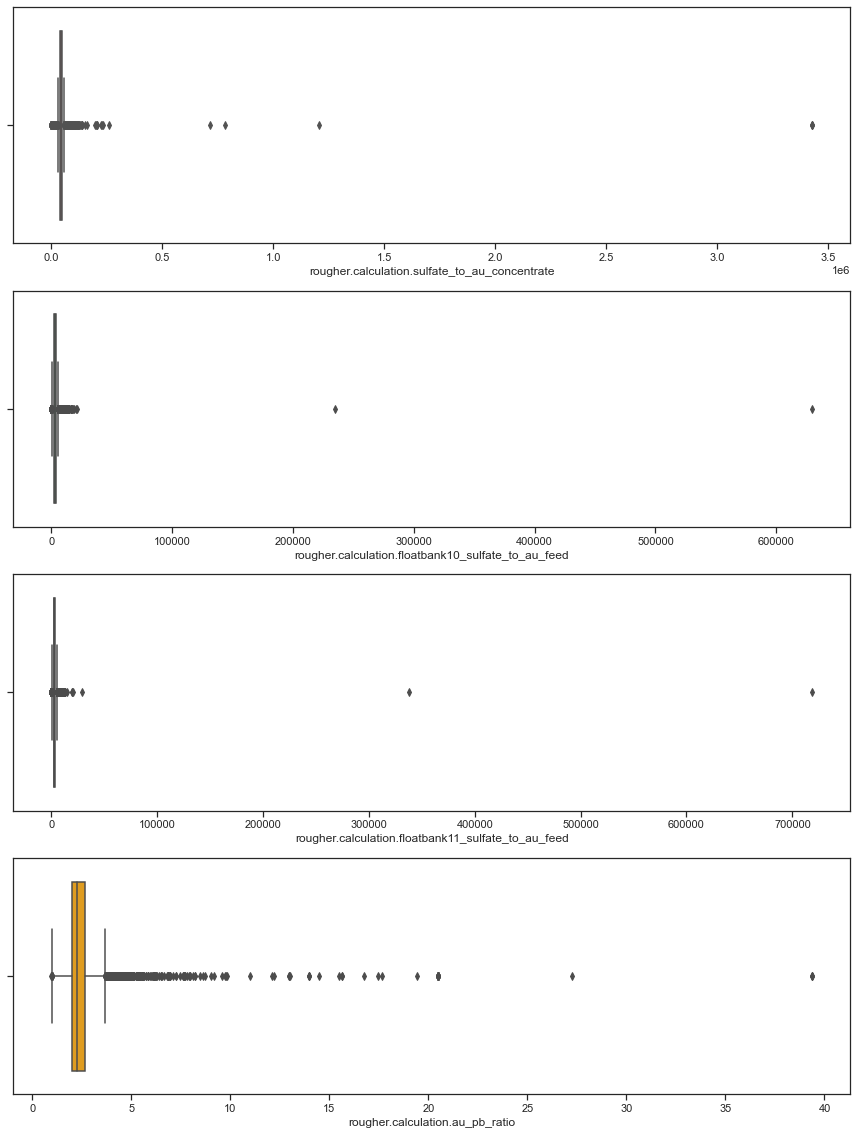

In [22]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 1, 1)
sns.boxplot(x=gold_train[difference_list[17]], color='r')
plt.subplot(4, 1, 2)
sns.boxplot(x=gold_train[difference_list[18]], color='g')
plt.subplot(4, 1, 3)
sns.boxplot(x=gold_train[difference_list[19]], color='b')
plt.subplot(4, 1, 4)
sns.boxplot(x=gold_train[difference_list[20]], color='orange')
plt.show()

Сократим отображаемый интервал для оценки

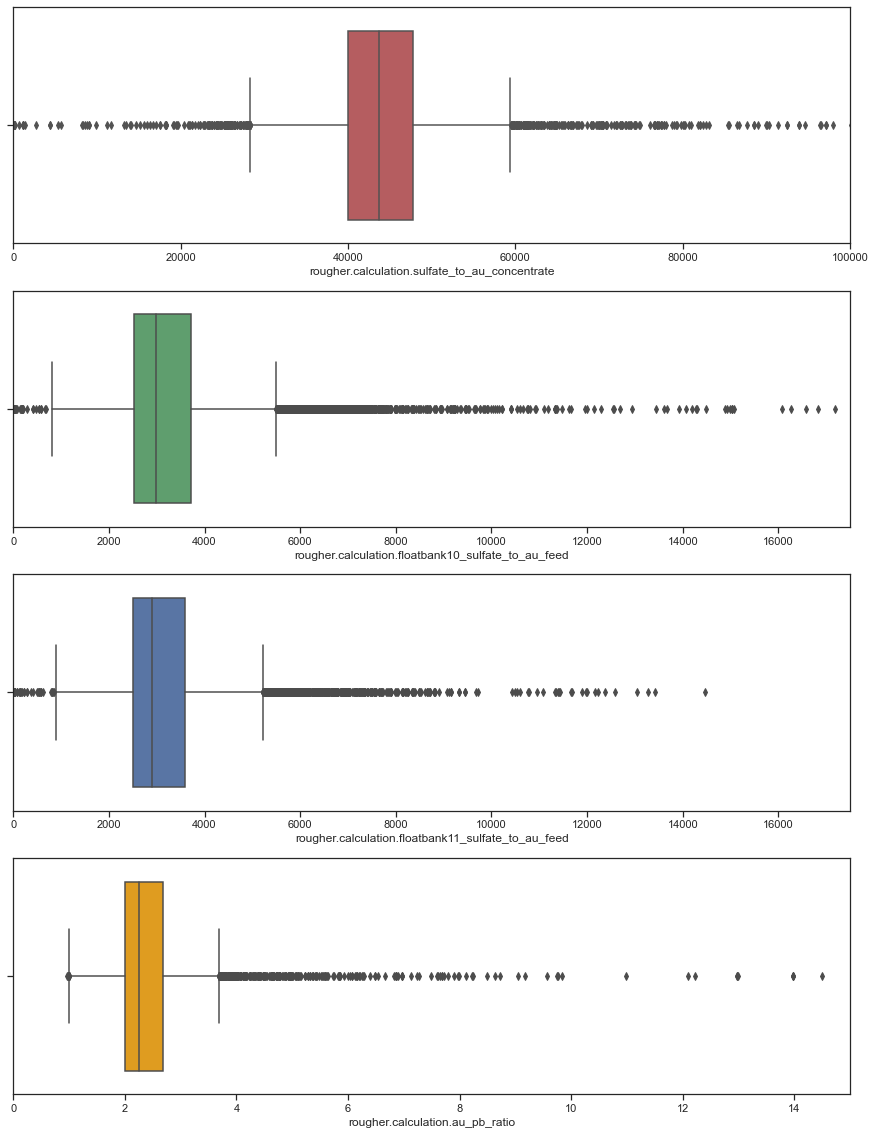

In [23]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 1, 1)
plt.xlim(0, 1e5)
sns.boxplot(x=gold_train[difference_list[17]], color='r')
plt.subplot(4, 1, 2)
plt.xlim(0, 1.75e4)
sns.boxplot(x=gold_train[difference_list[18]], color='g')
plt.subplot(4, 1, 3)
plt.xlim(0, 1.75e4)
sns.boxplot(x=gold_train[difference_list[19]], color='b')
plt.subplot(4, 1, 4)
plt.xlim(0, 15)
sns.boxplot(x=gold_train[difference_list[20]], color='orange')
plt.show()

In [24]:
# посчитаем кол-во кандидатов на удаление
print(gold_train[gold_train[difference_list[17]] > 1e5][difference_list[17]].count())
print(gold_train[gold_train[difference_list[18]] > 1.5e4][difference_list[18]].count())
print(gold_train[gold_train[difference_list[19]] > 1.5e4][difference_list[19]].count())
print(gold_train[gold_train[difference_list[20]] > 10][difference_list[20]].count())

46
15
6
36


In [25]:
# избавляемся от выбросов
gold_train.drop(index=gold_train[gold_train[difference_list[17]] > 1e5].index, inplace=True)
gold_train.drop(index=gold_train[gold_train[difference_list[18]] > 1.5e4].index, inplace=True)
gold_train.drop(index=gold_train[gold_train[difference_list[19]] > 1.5e4].index, inplace=True)
gold_train.drop(index=gold_train[gold_train[difference_list[20]] > 10].index, inplace=True)
gold_train = gold_train.reset_index(drop=True)

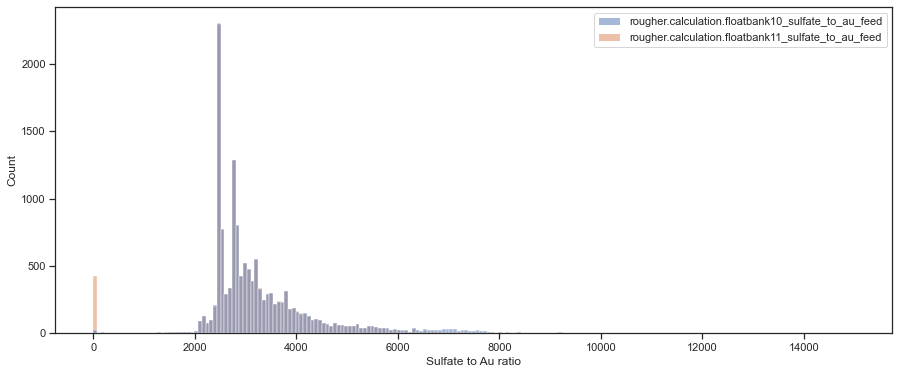

In [26]:
sns.histplot(gold_train[difference_list[18:20]])
plt.xlabel('Sulfate to Au ratio')
plt.show()

На гистограмме видно, что на второой флотационной установке около 400 значений находятся в области нуля. Возможно придётся удалить их в дальнейшем.

Расчётное значение соотношения сульфата и золота в концентрате

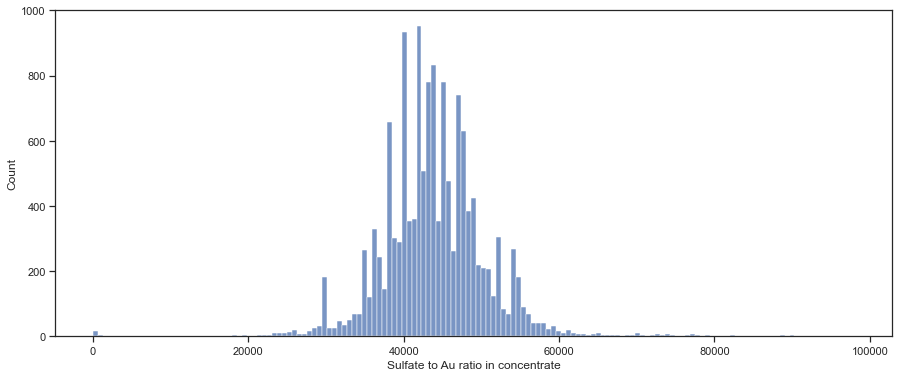

In [27]:
sns.histplot(data=gold_train[difference_list[17]])
plt.xlabel('Sulfate to Au ratio in concentrate')
plt.show()

Соотношение золота и свинца

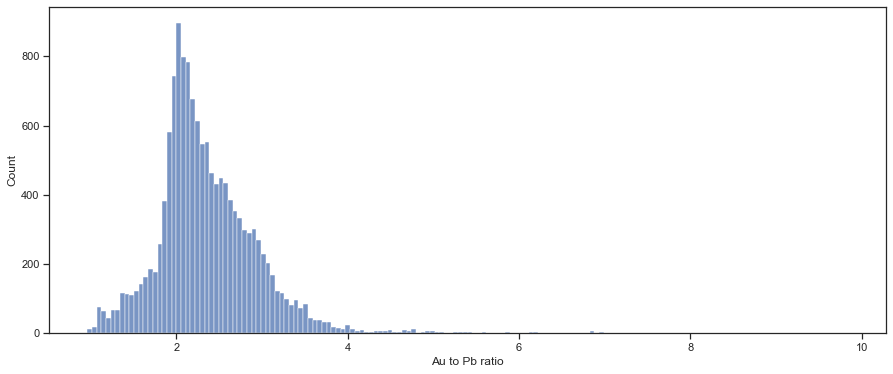

In [28]:
sns.histplot(gold_train[difference_list[20]])
plt.xlabel('Au to Pb ratio')
plt.show()

Эффективность флотации

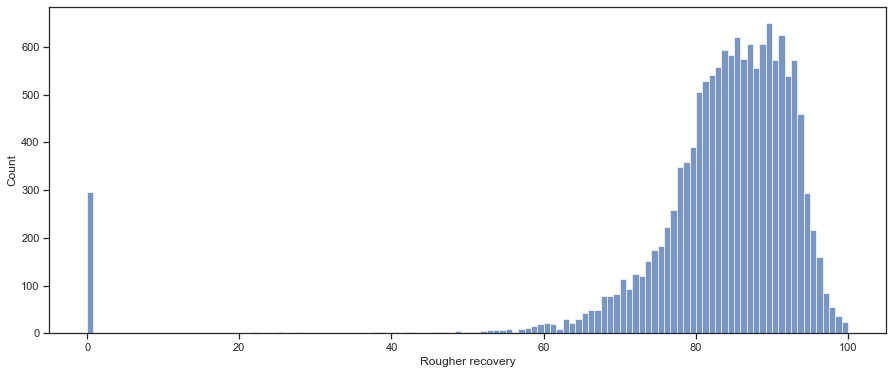

In [29]:
sns.histplot(data=gold_train[difference_list[25]])
plt.xlabel('Rougher recovery')
plt.show()

На двух предыдущих гистограммах так же присутствуют нестандартные околонулевые значения. Так как значения расчётные, есть основание полагать что в au_pb_ratio и rougher_output они появляются из-за возникшей аномалии на второй флотационной установке.

**Первичная очистка** концентрата

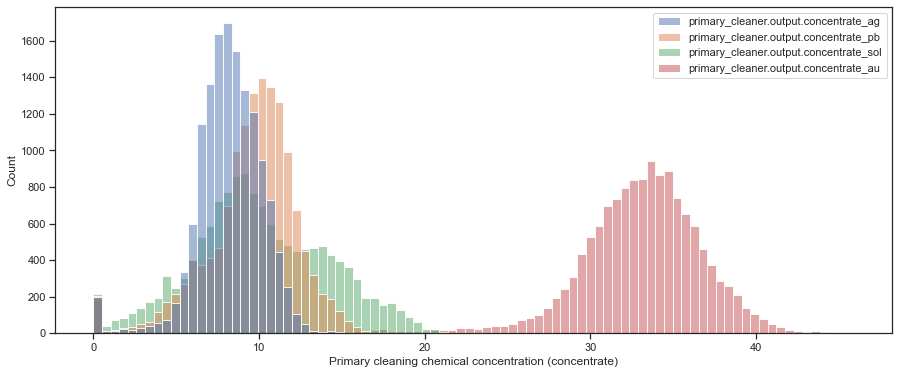

In [30]:
sns.histplot(data=gold_train[difference_list[9:13]])
plt.xlabel('Primary cleaning chemical concentration (concentrate)')
plt.show()

Хвосты после первичной очистки

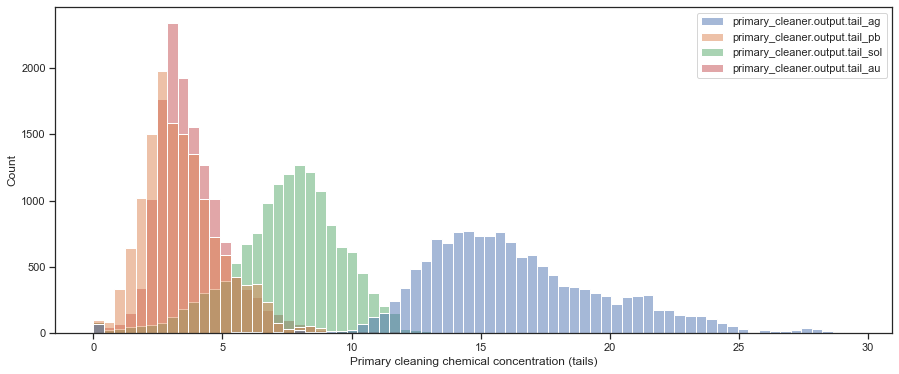

In [31]:
sns.histplot(data=gold_train[difference_list[13:17]])
plt.xlabel('Primary cleaning chemical concentration (tails)')
plt.show()

**Вторичная очистка** концентрата

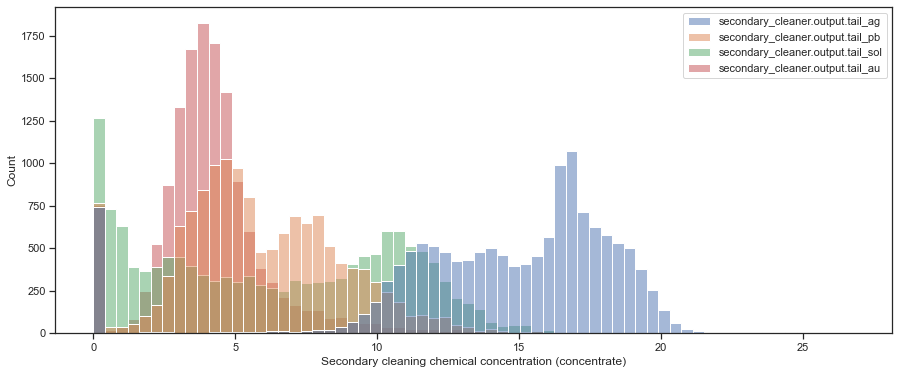

In [32]:
sns.histplot(data=gold_train[difference_list[30:]])
plt.xlabel('Secondary cleaning chemical concentration (concentrate)')
plt.show()

Хвосты после вторичной очистки

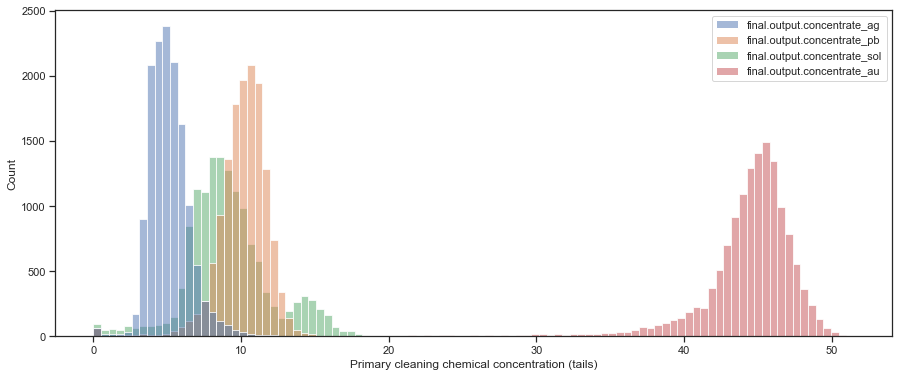

In [33]:
sns.histplot(data=gold_train[difference_list[0:4]])
plt.xlabel('Primary cleaning chemical concentration (tails)')
plt.show()

**Итоговая эффективность**

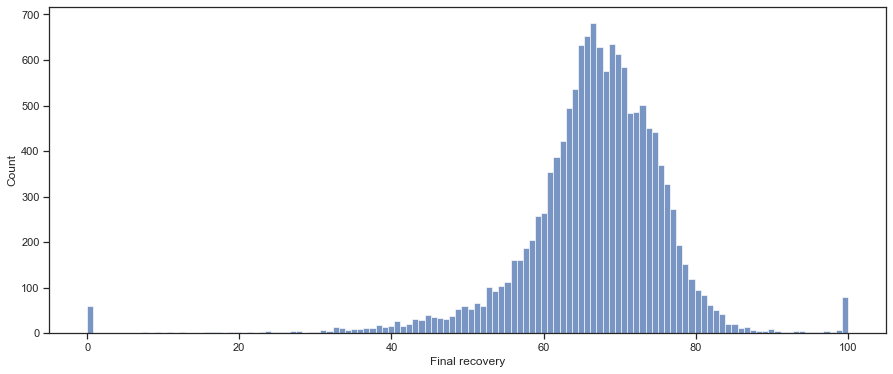

In [34]:
sns.histplot(data=gold_train[difference_list[4]])
plt.xlabel('Final recovery')
plt.show()

In [35]:
gold_train[difference_list[4]].describe()

count    14056.000000
mean        66.598328
std         10.157727
min          0.000000
25%         62.626468
50%         67.451520
75%         72.362995
max        100.000000
Name: final.output.recovery, dtype: float64

В категорию "избыточных" вошли признаки, характеризующие результаты каждого этапа обработки золота и некоторые расчётные характеристики.

## Исследовательский анализ данных

Анализ разбит на следующие этапы:

2.1. Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.  
2.2. Сравнение распределений размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.  
2.3. Исследование суммарной концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

### Анализ концентрации металлов на различных этапах очистки

**Флотация**

In [36]:
rougher_me = [difference_list[21], difference_list[22], difference_list[24]]

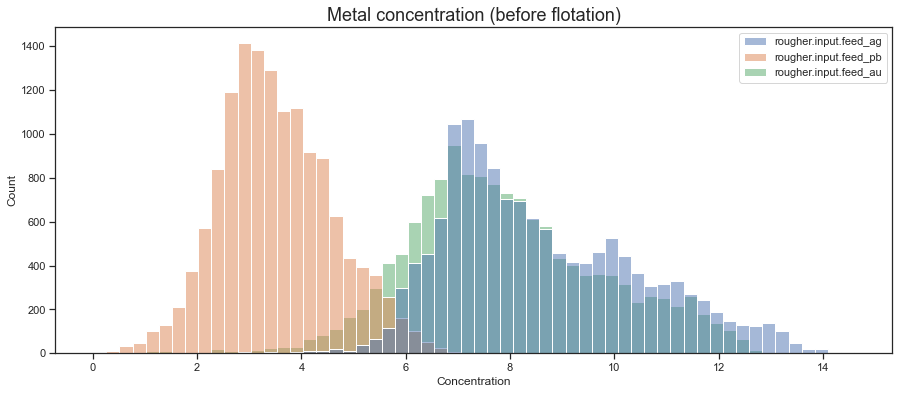

In [37]:
sns.histplot(data=gold_train[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']])
plt.xlabel('Concentration')
plt.title('Metal concentration (before flotation)', fontsize=18)
plt.show()

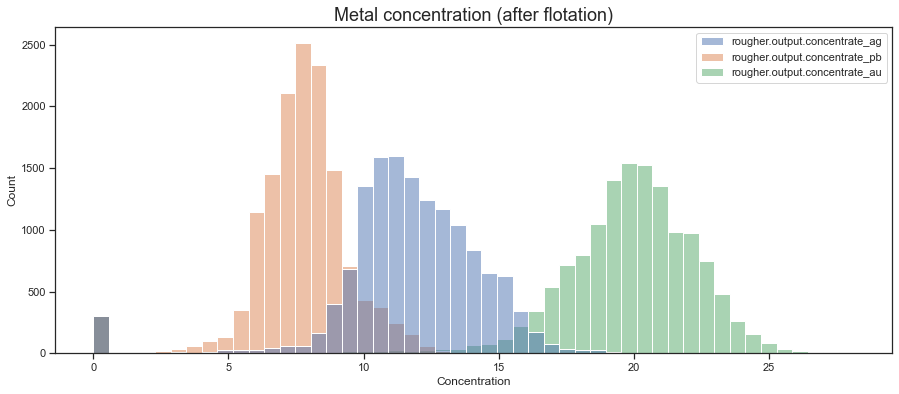

In [38]:
sns.histplot(data=gold_train[rougher_me])
plt.xlabel('Concentration')
plt.title('Metal concentration (after flotation)', fontsize=18)
plt.show()

In [39]:
gold_train[rougher_me].describe()

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au
count,14056.000000,14056.000000,14056.000000
mean,11.762326,7.675171,19.448212
std,2.720270,1.849728,3.765951
min,0.000000,0.000000,0.000000
25%,10.482566,6.861485,18.448096
50%,11.742026,7.764016,19.956261
75%,13.409302,8.605492,21.395240
max,24.480271,13.617072,28.146838


**Первичная очистка**

In [40]:
primary_me = [difference_list[9], difference_list[10], difference_list[12]]

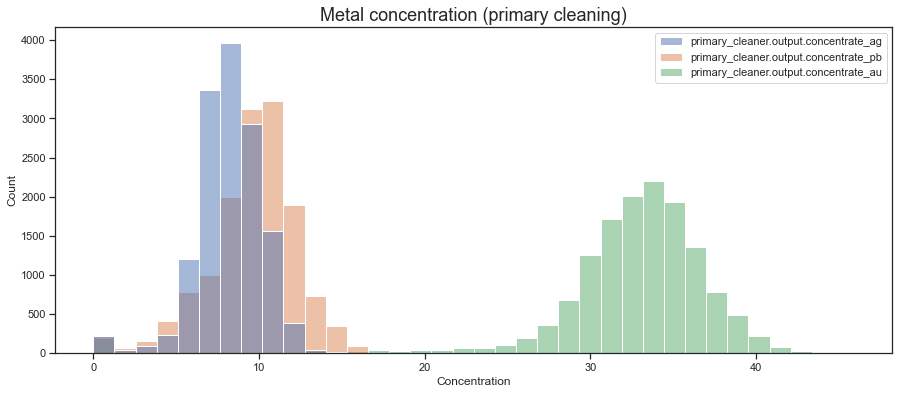

In [41]:
sns.histplot(data=gold_train[primary_me])
plt.xlabel('Concentration')
plt.title('Metal concentration (primary cleaning)', fontsize=18)
plt.show()

In [42]:
gold_train[primary_me].describe()

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au
count,14056.000000,14056.000000,14056.000000
mean,8.205338,9.593784,32.396716
std,1.995260,2.691631,5.751132
min,0.000000,0.000000,0.000000
25%,7.111313,8.342755,30.860549
50%,8.225552,9.939010,33.223644
75%,9.504580,11.312210,35.309829
max,16.081632,17.081278,45.933934


**Вторичная очистка**

In [43]:
secondary_me = [difference_list[0], difference_list[1], difference_list[3]]

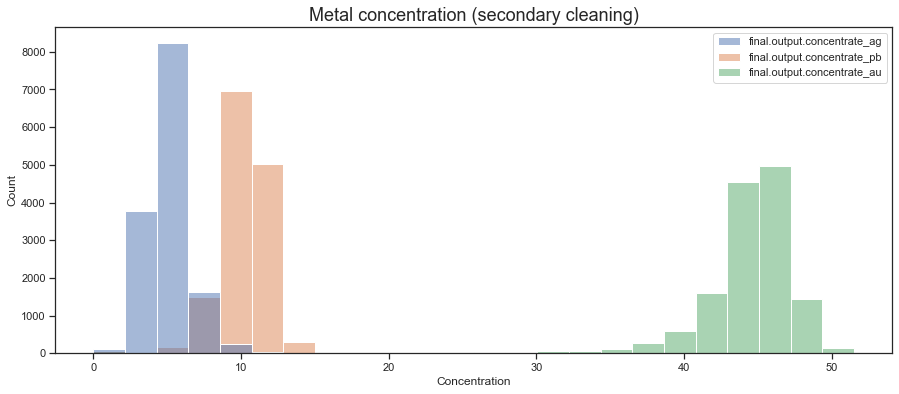

In [44]:
sns.histplot(data=gold_train[secondary_me])
plt.xlabel('Concentration')
plt.title('Metal concentration (secondary cleaning)', fontsize=18)
plt.show()

In [45]:
gold_train[secondary_me].describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
count,14056.000000,14056.000000,14056.000000
mean,5.135329,10.144275,44.006427
std,1.364881,1.644305,4.882746
min,0.000000,0.000000,0.000000
25%,4.208488,9.308972,43.282266
50%,4.988774,10.305421,44.874616
75%,5.851730,11.174069,46.160447
max,16.001945,17.031899,51.499940


In [46]:
gold_train[secondary_me].describe().loc['50%'] / gold_train[secondary_me].describe().iloc[-3, 0]

final.output.concentrate_ag    1.000000
final.output.concentrate_pb    2.065722
final.output.concentrate_au    8.995119
Name: 50%, dtype: float64

In [47]:
other_me = sum(gold_train[secondary_me].describe().iloc[-3, 0:2])
print(f'Au to other metals ratio: {gold_train[secondary_me].describe().iloc[-3, 2] / other_me:.0f} : {1}')

Au to other metals ratio: 3 : 1


Металлы после флотации имеют широкие распределения, близкие к нормальным. В последствии, после чистки, примеси свинца и серебра сокращаются. Итоговое соотношение элементов **Au : Pb : Ag** составляет **9 : 2 : 1** или **Au : Me = 3 : 1** что хорошо отражается в **final.output.recovery**.

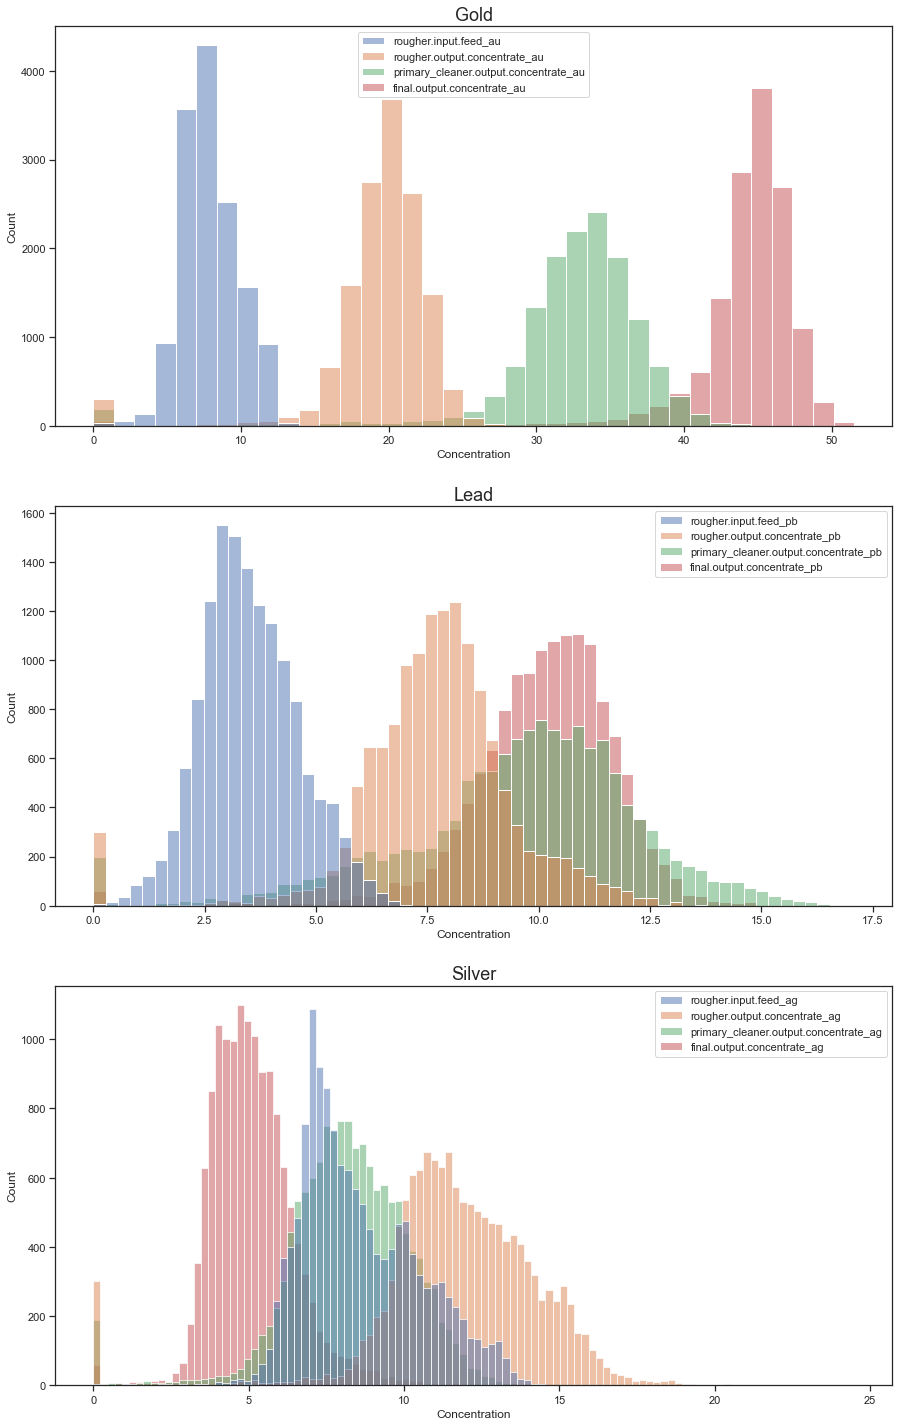

In [48]:
plt.figure(figsize=(15, 25))

plt.subplot(3, 1, 1)
plt.title('Gold', fontsize=18)
plt.xlabel('Concentration')
sns.histplot(data=gold_train[['rougher.input.feed_au', 
                              'rougher.output.concentrate_au', 
                              'primary_cleaner.output.concentrate_au',
                              'final.output.concentrate_au']])

plt.subplot(3, 1, 2)
plt.title('Lead', fontsize=18)
plt.xlabel('Concentration')
sns.histplot(data=gold_train[['rougher.input.feed_pb', 
                              'rougher.output.concentrate_pb', 
                              'primary_cleaner.output.concentrate_pb',
                              'final.output.concentrate_pb']])

plt.subplot(3, 1, 3)
plt.title('Silver', fontsize=18)
plt.xlabel('Concentration')
sns.histplot(data=gold_train[['rougher.input.feed_ag', 
                              'rougher.output.concentrate_ag', 
                              'primary_cleaner.output.concentrate_ag',
                              'final.output.concentrate_ag']])

plt.show()

Концентрация золота и свинца - растёт, серебра - падает.

### Анализ размеров гранул

In [49]:
# фреймы с необходимыми значениями
comparison_1 = pd.concat([gold_train['rougher.input.feed_size'], 
                          gold_test['rougher.input.feed_size']], 
                          axis=1)

comparison_2 = pd.concat([gold_train['primary_cleaner.input.feed_size'], 
                          gold_test['primary_cleaner.input.feed_size']], 
                         axis=1)

comparison_1.columns = ['train', 'test']
comparison_2.columns = ['train', 'test']

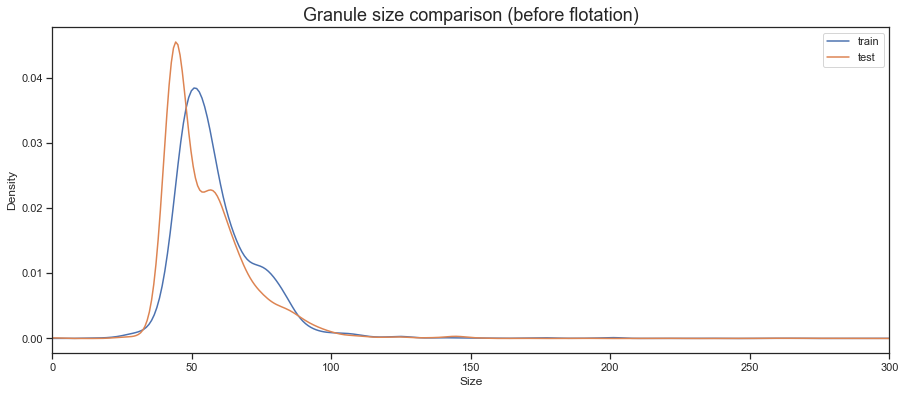

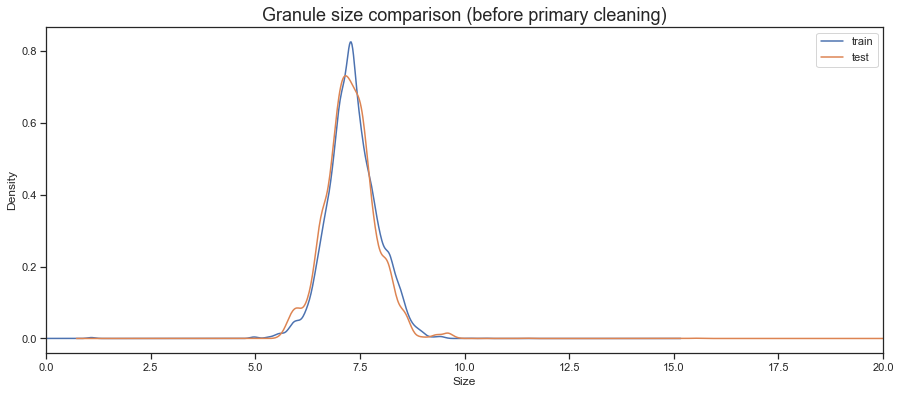

In [50]:
comparison_1.plot(kind='density')
plt.title('Granule size comparison (before flotation)', fontsize=18)
plt.xlabel('Size')
plt.xlim(0, 300)
plt.show()

comparison_2.plot(kind='density')
plt.title('Granule size comparison (before primary cleaning)', fontsize=18)
plt.xlabel('Size')
plt.xlim(0, 20)
plt.show()

In [51]:
comparison_1.describe()

,train,test
count,14056.000000,5289.000000
mean,60.190162,55.951097
std,23.014668,19.081758
min,9.659576,0.046369
25%,48.958552,43.906347
50%,55.221691,50.841029
75%,65.949960,62.431047
max,484.967466,392.494040


In [52]:
comparison_2.describe()

,train,test
count,14056.000000,5290.000000
mean,7.326378,7.266339
std,0.611765,0.610219
min,1.080000,5.650000
25%,6.970000,6.890000
50%,7.300000,7.250000
75%,7.700000,7.600000
max,10.470000,15.500000


Тестовая выборка до флотации слегка скошена влево, т.к. поступило больше гранул меньшего размера, однако распределения сильно перекрываются, что говорит о схожести данных.  
После флотации распределение размеров гранул практически индентично в рассматриваемых выборках. Переходим к следующему этапу.

### Исследование суммарной концентрации веществ на разных стадиях

In [53]:
# информация об исходном сырье
rougher_input = gold_train[['rougher.input.feed_ag', 
                            'rougher.input.feed_pb', 
                            'rougher.input.feed_au']]\
    .sum(axis=1)

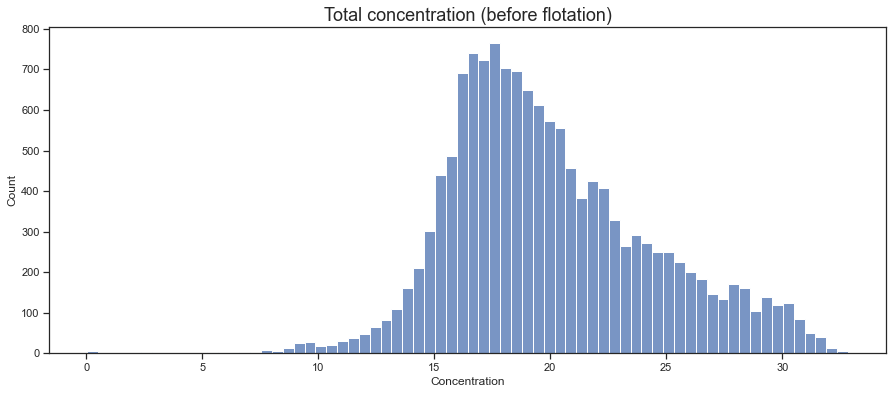

In [54]:
sns.histplot(data=rougher_input)
plt.title('Total concentration (before flotation)', fontsize=18)
plt.xlabel('Concentration')
plt.show()

In [55]:
# тут я создаю датафрейм из суммарной концентрации веществ после флотации
rougher_output_names = ['rougher.output.concentrate_ag', 
                        'rougher.output.concentrate_pb', 
                        'rougher.output.concentrate_au']

rougher_output = gold_train[rougher_output_names].sum(axis=1)

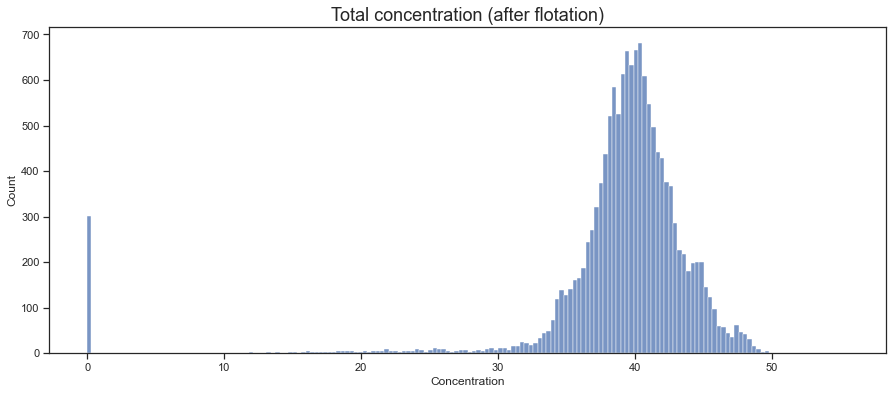

In [56]:
sns.histplot(data=rougher_output)
plt.title('Total concentration (after flotation)', fontsize=18)
plt.xlabel('Concentration')
plt.show()

In [57]:
# заполнение аномалий nan'ами
for column in rougher_output_names:
    gold_train.loc[gold_train[column] == 0, column] = np.nan

In [58]:
# коррекция выбросов
gold_train = gold_train.sort_values(by='date')\
    .reset_index(drop=True)\
    .fillna(method='ffill') 

In [59]:
# тут я создаю датафрейм из суммарной концентрации веществ после флотации
final_output_names = ['final.output.concentrate_ag', 
                      'final.output.concentrate_pb', 
                      'final.output.concentrate_au']

final_output = gold_train[final_output_names].sum(axis=1)

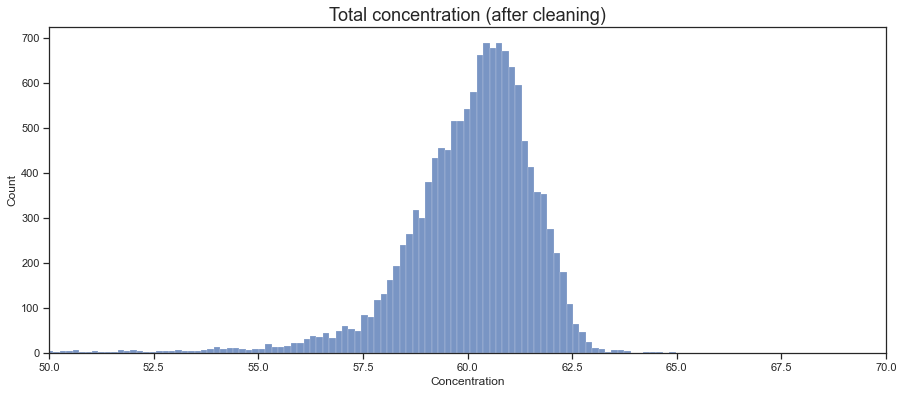

In [60]:
sns.histplot(data=final_output)
plt.title('Total concentration (after cleaning)', fontsize=18)
plt.xlabel('Concentration')
plt.xlim(50, 70)
plt.show()

Суммарная концентрация металлов выросла в ~3 раза

## Построение модели

Для решения посталвенной задачи вводится метрика **sMAPE**

### Составление функции sMAPE

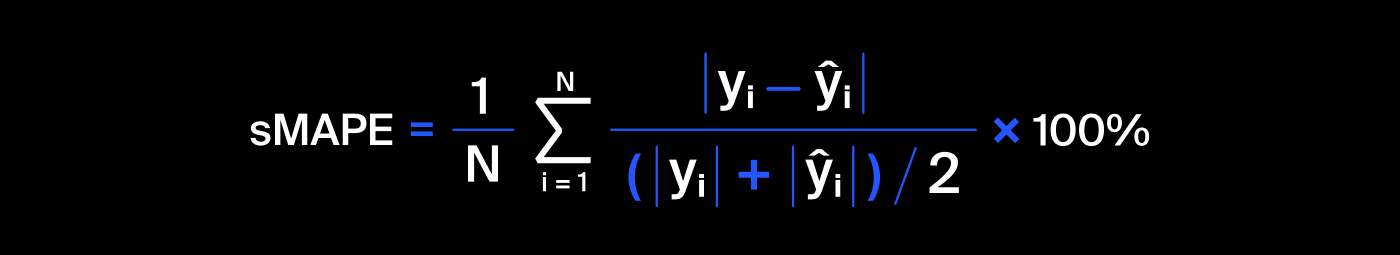

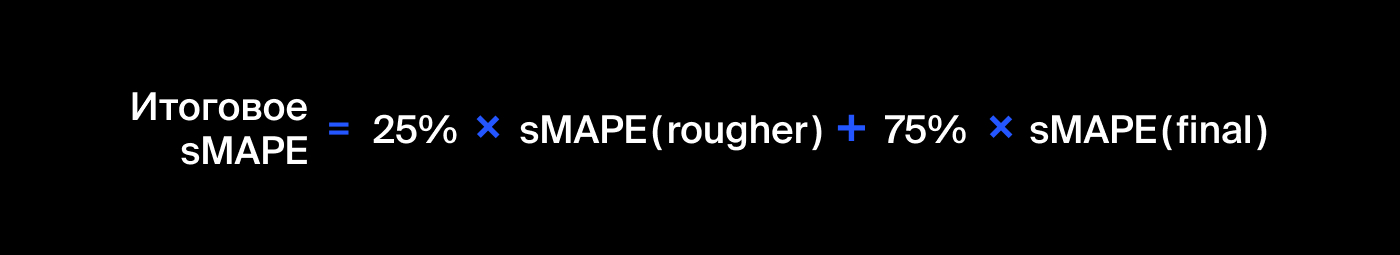

In [61]:
def smape(tar, pred):
    '''
    Функция получает на вход таргет и предсказанные значения
    Вычисляет smape для этапа флотации и этапа очистки
    возвращает total sMAPE
    '''
    N = len(pred)
    # модуль разности
    diff = np.abs(tar - pred)
    
    # полусумма модулей
    halfsum = (np.abs(tar) + np.abs(pred)) / 2
    return 100 * np.sum(diff / halfsum) / N 



def total_smape(smape_rough, smape_final):
    '''
    Функция получает на вход sMAPE для этапа флотации 
    и для финального recovery и возвращает итоговый sMAPE
    '''
    return (0.25 * smape_rough) + (0.75 * smape_final)

### Подготовка выборок

In [62]:
# для корректной работы моделей
gold_full['date'] = gold_full['date'].map(datetime.datetime.toordinal)
gold_train['date'] = gold_train['date'].map(datetime.datetime.toordinal)
gold_test['date'] = gold_test['date'].map(datetime.datetime.toordinal)

In [63]:
# тренировочная выборка
x = gold_train[gold_test.columns] #.drop('date', axis=1)
y = gold_train[['rougher.output.recovery', 
                'final.output.recovery']]

# тестовая выборка
x_test = gold_test # .drop('date', axis=1)
y_test = pd.merge(gold_test, gold_full, how='inner')[['rougher.output.recovery', 'final.output.recovery']]

In [64]:
# заполнение пропусков
x_test = x_test.fillna(method='ffill')

In [65]:
# компонент, масштабирующий признаки
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [66]:
# применяем к трейну и тесту
x_scaled = pd.DataFrame(scaler.transform(x), columns=scaler.get_feature_names_out())
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=scaler.get_feature_names_out())

In [67]:
# mutual information rougher
mi_rough = mutual_info_regression(x, y['rougher.output.recovery'], random_state=25)
mi_rough = pd.DataFrame(
    {'names': x.columns.tolist(), 
     'impact': mi_rough}).sort_values(by='impact', ascending=False)

In [68]:
# mutual information final
mi_final = mutual_info_regression(x, y['final.output.recovery'], random_state=25)
mi_final = pd.DataFrame(
    {'names': x.columns.tolist(), 
     'impact': mi_final}).sort_values(by='impact', ascending=False)

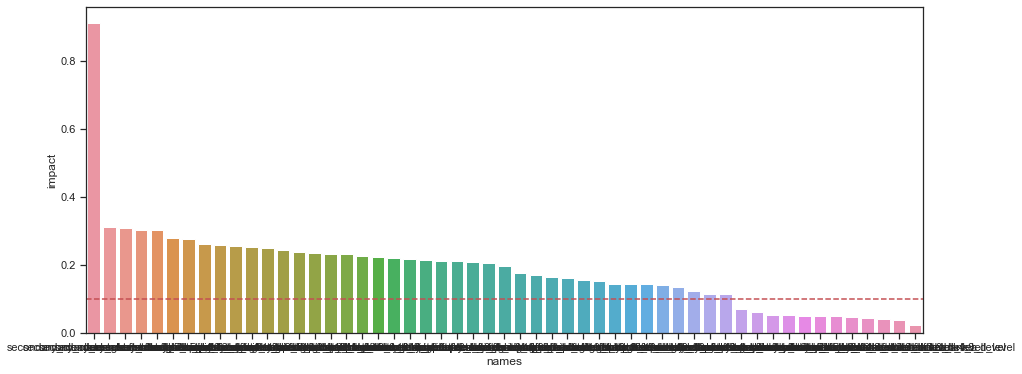

In [69]:
sns.barplot(x=mi_rough.names, y=mi_rough.impact)
plt.axhline(y=0.1, color='r', linestyle='--')
plt.show()

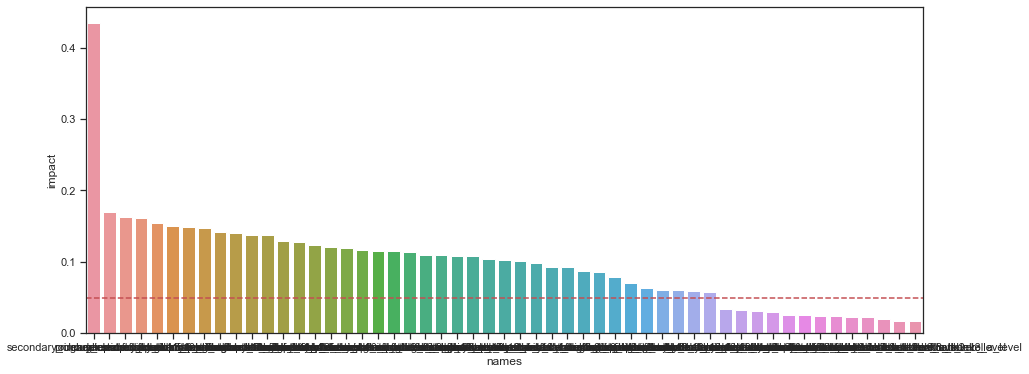

In [70]:
sns.barplot(x=mi_final.names, y=mi_final.impact)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.show()

In [71]:
# отсечение признаков минимально влияющих на целевой признак
mi_rough = mi_rough.drop(mi_rough[mi_rough['impact'] < 0.1].index)
mi_final = mi_final.drop(mi_final[mi_final['impact'] < 0.05].index)

Сделаем sMAPE scorer для кросс-валидации:

In [72]:
final_smape_scorer = make_scorer(smape, greater_is_better=False)

### Линейная регрессия

In [73]:
x_train = x_scaled[mi_rough.names]

linreg_rougher = LinearRegression()
scores_rougher = cross_val_score(linreg_rougher, 
                                 x_train, 
                                 y['rougher.output.recovery'], 
                                 cv=5, 
                                 scoring=final_smape_scorer)

print(f'Average linreg sMAPE: {abs(sum(scores_rougher)/len(scores_rougher)):.3f}')

Average linreg sMAPE: 11.694


In [74]:
linreg_rougher.fit(x_train, y['rougher.output.recovery'])
linreg_r = linreg_rougher.predict(x_test_scaled[mi_rough.names])

In [75]:
round(smape(tar=y_test['rougher.output.recovery'], pred=linreg_r), 2)

9.86

In [76]:
x_train = x_scaled[mi_final.names]

linreg_final = LinearRegression()
scores_final = cross_val_score(linreg_final, 
                               x_train, 
                               y['final.output.recovery'], 
                               cv=5, 
                               scoring=final_smape_scorer)

print(f'Average linreg sMAPE: {abs(sum(scores_final)/len(scores_final)):.3f}')

Average linreg sMAPE: 10.184


In [77]:
linreg_final.fit(x_train, y['final.output.recovery'])
linreg_f = linreg_final.predict(x_test_scaled[mi_final.names])

In [78]:
round(smape(tar=y_test['final.output.recovery'], pred=linreg_f), 2)

9.8

### Дерево решений

In [79]:
# параметры для подбора методом кросс валидации
tree_params = {'max_depth': range(5, 10), 
               'min_samples_split': range(2, 6),
               'min_samples_leaf': range(1, 6)} 

In [80]:
x_train = x_scaled[mi_rough.names]

In [81]:
tree_rough = GridSearchCV(DecisionTreeRegressor(random_state=25), 
                          param_grid=tree_params, 
                          cv=3, 
                          scoring=final_smape_scorer, 
                          n_jobs=-1,
                          error_score='raise').fit(x_train, y['rougher.output.recovery'])

In [82]:
# параметры для подбора методом кросс валидации
tree_params = {'max_depth': range(1, 15), 
               'min_samples_split': range(2, 8),
               'min_samples_leaf': range(1, 8)} 

In [83]:
x_train = x_scaled[mi_final.names]

In [84]:
tree_final = GridSearchCV(DecisionTreeRegressor(random_state=25), 
                          param_grid=tree_params, 
                          cv=3, 
                          scoring=final_smape_scorer, 
                          n_jobs=-1,
                          error_score='raise').fit(x_train, y['final.output.recovery'])

In [85]:
print(round(abs(tree_rough.best_score_), 2))
print(round(abs(tree_final.best_score_), 2))
print(tree_rough.best_params_)
print(tree_final.best_params_)

11.72
11.43
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [86]:
print(f'{total_smape(smape_rough=abs(tree_rough.best_score_), smape_final=abs(tree_final.best_score_)):.2f}')

11.50


### Случайный лес

In [87]:
# параметры для подбора методом кросс валидации
forest_params = {'n_estimators': range(10, 21, 10), 
                 'max_depth': range(3, 7), 
                 'min_samples_split': range(2, 3),
                 'min_samples_leaf': range(10, 60, 10)} 

In [88]:
x_train = x_scaled[mi_rough.names]

In [89]:
forest_rough = GridSearchCV(RandomForestRegressor(random_state=25), 
                            param_grid=forest_params, 
                            cv=3, 
                            scoring=final_smape_scorer, 
                            n_jobs=-1,
                            error_score='raise').fit(x_train, y['rougher.output.recovery'])

In [90]:
# параметры для подбора методом кросс валидации
forest_params = {'n_estimators': range(1, 11, 10), 
                 'max_depth': range(1, 5), 
                 'min_samples_split': range(2, 4),
                 'min_samples_leaf': range(1, 6)} 

In [91]:
x_train = x_scaled[mi_final.names]

In [92]:
forest_final = GridSearchCV(RandomForestRegressor(random_state=25), 
                            param_grid=forest_params, 
                            cv=3, 
                            scoring=final_smape_scorer, 
                            n_jobs=-1,
                            error_score='raise').fit(x_train, y['final.output.recovery'])

In [93]:
print(round(abs(forest_rough.best_score_), 2))
print(round(abs(forest_final.best_score_), 2))
print(forest_rough.best_params_)
print(forest_final.best_params_)

12.01
11.41
{'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 2, 'n_estimators': 20}
{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}


In [94]:
print(f'{total_smape(smape_rough=abs(forest_rough.best_score_), smape_final=abs(forest_final.best_score_)):.2f}')

11.56


Наилучшая оценка метрики **sMAPE** принадлежит линейной регрессии.

## Итоговое тестирование

Проведём итоговое тестирование лучшей модели на тестовой выборке.

In [100]:
final_test_r = smape(linreg_rougher.predict(x_test_scaled[mi_rough.names]), y_test['rougher.output.recovery'])
final_test_f = smape(linreg_final.predict(x_test_scaled[mi_final.names]), y_test['final.output.recovery'])
print(f'Test sMAPE rougher: {final_test_r:.2f} %')
print(f'Test sMAPE final:   {final_test_f:.2f} %')

Test sMAPE rougher: 9.86 %
Test sMAPE final:   9.80 %


In [102]:
print(f'Total sMAPE: {total_smape(smape_rough=final_test_r, smape_final=final_test_f):.2f} %')

Total sMAPE: 9.82 %


Сравнение с dummy-регрессором, со средними предсказаниями

In [97]:
dummy_rough = DummyRegressor().fit(x_scaled[mi_rough.names], y['rougher.output.recovery'])
dummy_final = DummyRegressor().fit(x_scaled[mi_final.names], y['final.output.recovery'])

In [98]:
dr = smape(tar=y_test['rougher.output.recovery'], pred=dummy_rough.predict(x_test_scaled[mi_rough.names]))
df = smape(tar=y_test['rougher.output.recovery'], pred=dummy_final.predict(x_test_scaled[mi_final.names]))

In [99]:
print(f'Dummy total sMAPE: {total_smape(smape_rough=dr, smape_final=df):.2f} %')

Dummy total sMAPE: 24.76 %


Модель показывает лучший результат, чем dummy-регрессор, следовательно может быть использована.

## Вывод

В данной работе для компании "Цифры" требовалось создать модель машинного обучения, для оптимизации процесса обработки золота. Компанией были преподставлены датасеты с характеристиками установок, сырья и расчётными параметрами процесса обработки. 
Для решения поставленной задачи были предприняты следующие шаги:
1. Изучение предоставленных датасетов, с целью выявления пригодности датасетов и подготовки к этапу машинного обучения
2. Исследователский анализ данных, с целью потенциального выявления закономерностей и аномалий в датасетах
3. Тестирование различных моделей машинного обучения, с целью выявления модели с наименьшей метрикой **sMAPE**
4. Итоговое тестирование модели-победителя и сравнение с константной моделью  

В ходе анализа была установлена корректность и адекватность присланных данных, выявлены и обработаны пропуски, а так же аномалии в значениях концентраций.

После выполнения всех шагов была подготовлена и обучена модель машинного обучения: **линейная регрессия**
